In [1]:
# -----------------------------
# SIMPLE DENOISING AUTOENCODER (MNIST CSV)
# -----------------------------
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load MNIST from CSV
data = pd.read_csv(r"C:\Users\marta\Downloads\MNIST-20221031T095906Z-001\MNIST\mnist_784_csv.csv")

In [3]:
# Separate features and normalize
X = data.iloc[:, :-1].values / 255.0   # pixel columns
X = X.reshape(-1, 784)


In [4]:
# Split into train/test
split = int(0.8 * len(X))
x_train, x_test = X[:split], X[split:]


In [5]:
# Add Gaussian noise
noise_factor = 0.4
x_train_noisy = np.clip(x_train + noise_factor * np.random.randn(*x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.randn(*x_test.shape), 0., 1.)

In [6]:
# Build Autoencoder
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

C:\Users\marta\Anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Train
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2781 - val_loss: 0.2371
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2180 - val_loss: 0.2041
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1997 - val_loss: 0.1962
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1924 - val_loss: 0.1863
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1836 - val_loss: 0.1806
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1790 - val_loss: 0.1765
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1751 - val_loss: 0.1726
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1715 - val_loss: 0.1694
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1686 - val_loss: 0.1671
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1663 - val_loss: 0.1653


In [9]:
# Reconstruct (Denoise)
decoded = autoencoder.predict(x_test_noisy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   


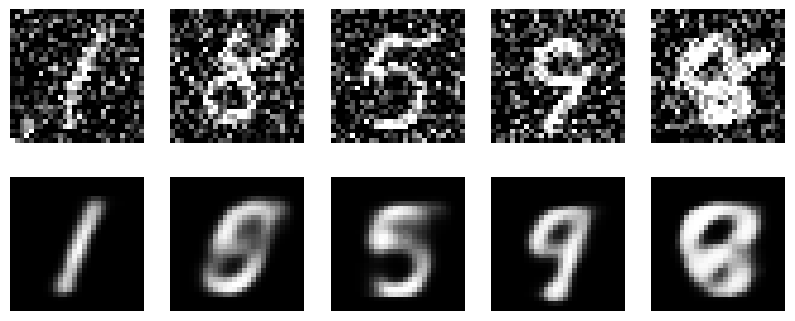

In [10]:
# Visualize Original vs Denoised
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()